In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from catboost import CatBoostRegressor
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
#from skopt import BayesSearchCV
#from skopt.space import Real, Integer
import gc
import lightgbm as lgb
#import optuna
%matplotlib inline
print("Libraries imported")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Libraries imported


In [2]:
from google.colab import files

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c widsdatathon2023
! unzip /content/widsdatathon2023.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 99% 202M/203M [00:07<00:00, 29.3MB/s]
100% 203M/203M [00:07<00:00, 28.4MB/s]
Archive:  /content/widsdatathon2023.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [4]:
cc_train = pd.read_csv('/content/train_data.csv')
cc_test = pd.read_csv('/content/test_data.csv')
cc_sample = pd.read_csv('/content/sample_solution.csv')

In [5]:
# Save into a new dataset
train_df = cc_train.copy()
test_df = cc_test.copy()

In [52]:
cat = pd.read_csv("/content/CatBoost_best_ver.csv")
cat

,contest-tmp2m-14d__tmp2m,index
0,28.047133,375734
1,28.210790,375735
2,28.217044,375736
3,28.253622,375737
4,28.393301,375738
...,...,...
31349,6.401028,407083
31350,6.622227,407084
31351,5.840455,407085
31352,6.256068,407086


In [53]:
tab_net = pd.read_csv("/content/TabNet_best_ver.csv")
tab_net

,contest-tmp2m-14d__tmp2m,index
0,28.102037,375734
1,28.146267,375735
2,28.162115,375736
3,28.240578,375737
4,28.321194,375738
...,...,...
31349,6.478497,407083
31350,6.700060,407084
31351,6.274863,407085
31352,6.480490,407086


In [54]:
lgb = pd.read_csv("/content/LGB_best_ver.csv")
lgb

,contest-tmp2m-14d__tmp2m,index
0,28.895010,375734
1,28.957336,375735
2,28.985981,375736
3,29.237684,375737
4,29.395806,375738
...,...,...
31349,5.586466,407083
31350,5.965438,407084
31351,4.821712,407085
31352,5.827467,407086


In [55]:
xg = pd.read_csv("/content/XGBoost_final_ver.csv")
xg

,contest-tmp2m-14d__tmp2m,index
0,28.814430,375734
1,28.596518,375735
2,28.639528,375736
3,28.677570,375737
4,28.823063,375738
...,...,...
31349,5.824567,407083
31350,6.387394,407084
31351,5.291544,407085
31352,6.193798,407086


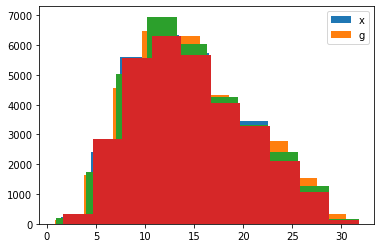

In [41]:
for each, name in [(tab_net, "tab"), (cat, "cat"), (lgb, "lgb"), (xg, "xg")]:
  plt.hist(each[target])
  plt.legend(name)
  #plt.title(name)
  #plt.show()

In [31]:
target = "contest-tmp2m-14d__tmp2m"

In [12]:
rmses = [0.917, 0.976, 0.854, 0.754]
for each in rmses:
  print(each / sum(rmses))

0.2619251642387889
0.2787774921451014
0.24393030562696372
0.21536703798914597


In [56]:
ensemble_preds = lgb[target]*0.35+tab_net[target]*0.35 + xg[target] * 0.15 + cat[target] * 0.15

In [22]:
#ensemble_preds = lgb[target]*0.2+tab_net[target]*0.3 + xg[target] * 0.4 + cat[target] * 0.1

In [57]:
cc_submission = cc_test.copy()
cc_submission[target] = ensemble_preds
cc_submission[[target,"index"]].to_csv('ensembe_final_submission_old_models.csv', index = False)

In [58]:
files.download('/content/ensembe_final_submission_old_models.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>